In [56]:
import pandas as pd
pd.__version__

'2.2.2'

#### Definindo os dados

In [57]:
dict_metrics = {"idade": [15, 18, 25, 26, 40, 40, 58, 60],
                "altura": [160, 165, 149, 168, 172, 174, 174, 178]}

In [58]:
type(dict_metrics)

dict

In [59]:
#Criar dataframe

df = pd.DataFrame(dict_metrics)

In [60]:
type(df)

pandas.core.frame.DataFrame

In [61]:
df

,idade,altura
0,15,160
1,18,165
2,25,149
3,26,168
4,40,172
5,40,174
6,58,174
7,60,178


#### Medidas de posição
- Média: soma de todos os valores dividida pelo número de valores. É a medida mais comum de tendência central. Pode ser sensível a valores extremos.
- Mediana: É o valor do meio quando os dados estão ordenados. Não sofre por valores extremos. É útil em distribuições assimétricas.
- Moda: É o valor que ocorre com maior frequência. É útil em dados categóricos ou quando deseja-se identificar valores com maior frequência.


In [62]:
#Duas formas de acessar uma coluna no dataframe

df["idade"] #OU


0    15
1    18
2    25
3    26
4    40
5    40
6    58
7    60
Name: idade, dtype: int64

In [63]:
df.idade

0    15
1    18
2    25
3    26
4    40
5    40
6    58
7    60
Name: idade, dtype: int64

In [64]:
#Média de cada coluna

print(f'A média da idade é: {df["idade"].mean()} anos.')
print(f'A média da altura é: {df["altura"].mean()} cm.')

A média da idade é: 35.25 anos.
A média da altura é: 167.5 cm.


In [65]:
##Mediana de cada coluna

print(f'A mediana da idade é: {df["idade"].median()} anos.')
print(f'A mediana da altura é: {df["altura"].median()} cm.')

A mediana da idade é: 33.0 anos.
A mediana da altura é: 170.0 cm.


In [66]:
##Moda de cada coluna

print(f'A moda da idade é: {df["idade"].mode()} anos.')
print(f'A moda da altura é: {df["altura"].mode()} cm.')

A moda da idade é: 0    40
Name: idade, dtype: int64 anos.
A moda da altura é: 0    174
Name: altura, dtype: int64 cm.


#### Medidas de dispersão

- Variância: É a média dos quadrados entre cada valor e a média. Informa quão distantes os valores estão da média.
- Desvio padrão: É a medidade de dispersão mais usdada. É a raiz quadrada da variância. Expressa a dispersão em termos da mesma unidade dos dados.
- Coeficiente de variação: É o desvio padrão dividido pela média, expresso em porcentagem. Indica a variabilidade relativa dos dados em relação à média. 



In [67]:
#Variância
print(f'Variância de idade: {df["idade"].var():.2f}')
print(f'Variância de altura: {df["altura"].var():.2f}')

Variância de idade: 296.21
Variância de altura: 88.57


In [68]:
#Desvio padrão

print(f'Desvio padrão da idade: {df["idade"].std():.2f}')
print(f'Desvio padrão da altura: {df["altura"].std():.2f}')

#Pelo resultado verificamos que a altura está mais próxima da média que a idade.


Desvio padrão da idade: 17.21
Desvio padrão da altura: 9.41


In [69]:
#Coeficiente de variação
cof_idade = df["idade"].std() / df["idade"].mean() * 100
cof_altura = df["altura"].std() / df["altura"].mean() * 100

print(f'Coeficiente de variação da idade: {cof_idade:.2f}%')
print(f'Coeficiente de variação da altura: {cof_altura:.2f}%')

Coeficiente de variação da idade: 48.83%
Coeficiente de variação da altura: 5.62%


#### Medidas de formas (Distribuição dos dados)

- Assimétrica: indica o grau e a direção da distorção da distribuição em relação à média. Se positiva, indica a cauda direita da distribuição mais longa. Já o oposto, indica a cauda esquerda mais longa.
- Curtose: mede o pico ou "pontuação" da distribuição. Uma curtose alta indica uma distribuição mais concentrada, já o oposto, indica uma distribuição mais achatada.

In [70]:
df

,idade,altura
0,15,160
1,18,165
2,25,149
3,26,168
4,40,172
5,40,174
6,58,174
7,60,178


In [71]:
#Assimetrica

print(f'Assimetria de idade: {df["idade"].skew():.2f}')
#Assimettria de idade positiva: valores maiores estão mais espalhados.
print(f'Assimetria de altura: {df["altura"].skew():.2f}')
#Assimettria de altura negativa: valores maiores estão mais próximos.

Assimetria de idade: 0.44
Assimetria de altura: -1.14


In [72]:
#Curtose

print(f'Curtose de idade: {df["idade"].kurtosis():.2f}')
#Curtose da idade negativa: dados estão mais espalhados.
print(f'Curtose de altura: {df["altura"].kurtosis():.2f}')
#Curtose da altura positiva: valores mais concentrados na média.

Curtose de idade: -1.31
Curtose de altura: 1.06


In [73]:
#Traz algumas informações estatísticas
df.describe()

,idade,altura
count,8.000000,8.000000
mean,35.250000,167.500000
std,17.210877,9.411239
min,15.000000,149.000000
25%,23.250000,163.750000
50%,33.000000,170.000000
75%,44.500000,174.000000
max,60.000000,178.000000


#### Correlação

- Mede a relação entre duas variáveis. Se positiva, as variáveis aumentam juntas. Caso contrário, uma aumenta enquanto a outra diminui. Ou se não há nenhum correlação.
- Ajuda a selecionar características relevantes para os modelos, melhorando a precisão e a interpretabilidade.

##### Índices de correlação

- Coeficiente de Pearson: mede a relação linear entre duas variáveis, variando de -1 a 1. E 0 para nenhuma correlação.
- Coeficiente de Spearman: é útil quando os dados não tem uma relação linear clara ou quando as variáveis não são númericamente escalonáveis.
- Pearson: para relações lineares e variáveis conítnuas. Spearman: relações não lineares, ordinais ou com outliers.

In [74]:
df.corr(method="pearson")

,idade,altura
idade,1.000000,0.740852
altura,0.740852,1.000000


In [75]:
df.corr(method="spearman")

,idade,altura
idade,1.000000,0.909639
altura,0.909639,1.000000


In [76]:
#Especificando as colunas:

df["altura"].corr(df["idade"], method="pearson")

0.7408519382898473

In [77]:
df["altura"].corr(df["idade"], method="spearman")

0.9096385542168675

#### Histograma

<Axes: >

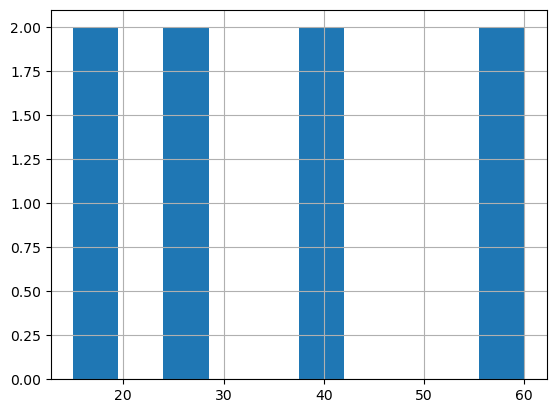

In [78]:

df["idade"].hist()

<Axes: >

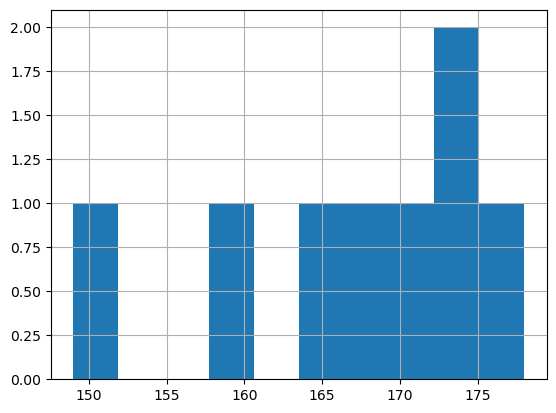

In [79]:
df["altura"].hist()

#### Box plot

<Axes: >

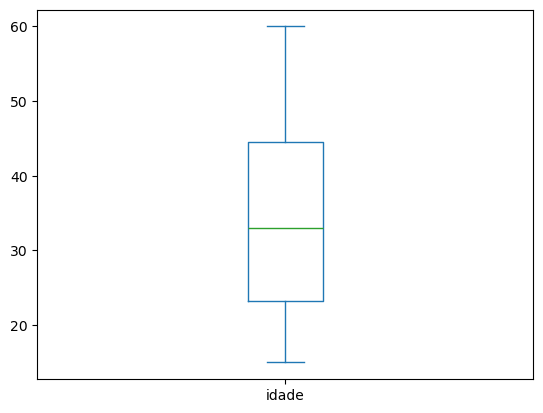

In [80]:
df.idade.plot.box()

<Axes: >

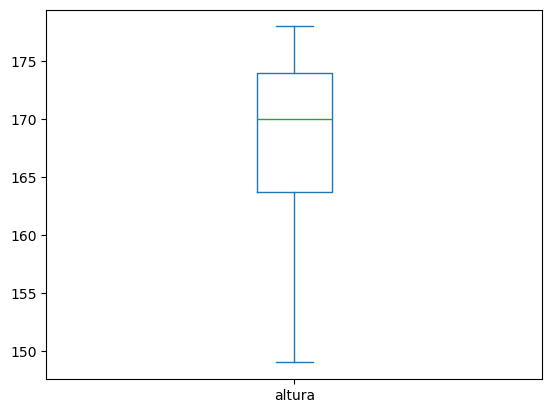

In [81]:
df.altura.plot.box()

#### Scatter plot ou gráfico de dispersão

<Axes: xlabel='idade', ylabel='altura'>

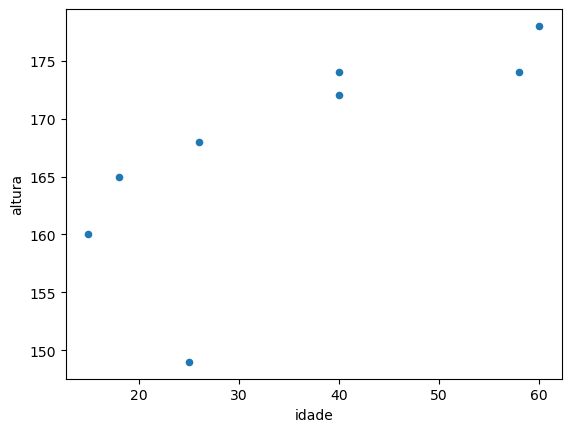

In [82]:
df.plot.scatter(x="idade", y="altura")

#### Gráfico de barras

In [83]:
dic_vendas ={
    "categoria": ["eletrodomésticos", "games", "livros", "casa"],
    "valor": [20000, 50000, 10000, 200000],
    "quantidade": [200, 500, 300, 1500]
}

In [84]:
df_vendas = pd.DataFrame(dic_vendas)
df_vendas

,categoria,valor,quantidade
0,eletrodomésticos,20000,200
1,games,50000,500
2,livros,10000,300
3,casa,200000,1500


<Axes: xlabel='categoria'>

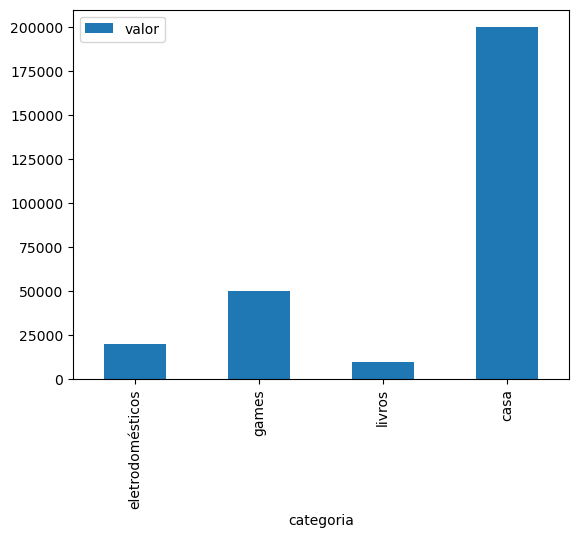

In [85]:
df_vendas.plot.bar(x="categoria", y="valor")

<Axes: xlabel='categoria'>

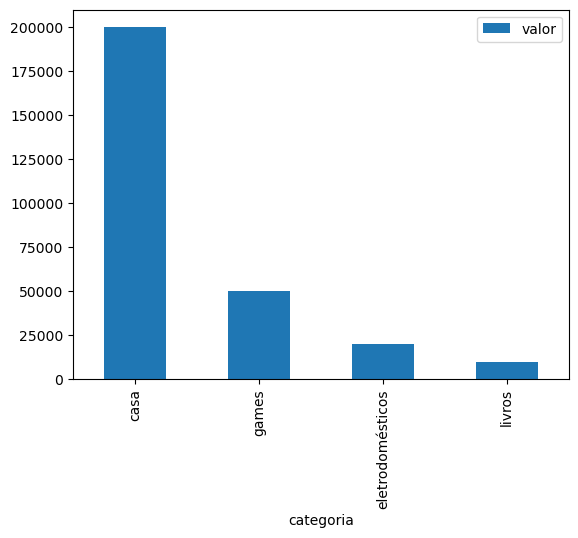

In [86]:
#O mesmo gráfico ordenado pelo valor

df_vendas.sort_values("valor", ascending=False).plot.bar(x="categoria", y="valor")

<Axes: xlabel='categoria'>

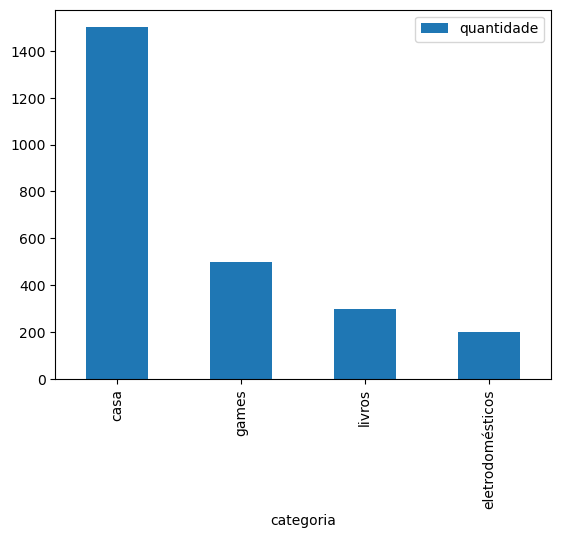

In [87]:
#Gráfico de barras na vertical

df_vendas.sort_values("quantidade", ascending=False).plot.bar(x="categoria", y="quantidade")

<Axes: ylabel='categoria'>

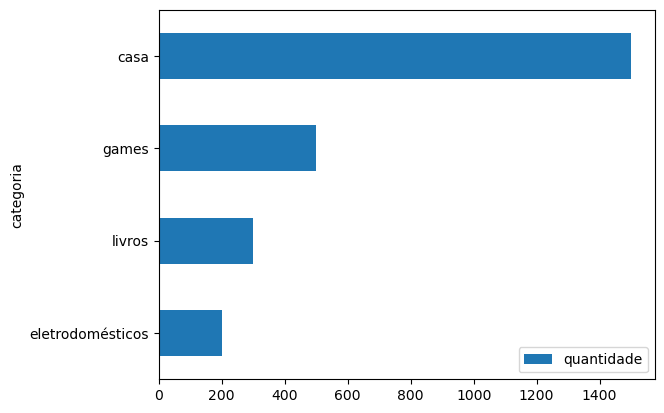

In [89]:
#Gráfico de barras na horizontal

df_vendas.sort_values("quantidade", ascending=True).plot.barh(x="categoria", y="quantidade")

#### Gráfico de linha

In [90]:
dic_faturamento = { "data": ["2020", "2021", "2022", "2023", "2024", "2025"],
                   "valor": [100000, 150000, 170000, 140000, 200000, 180000]

}

In [92]:
df_faturamento = pd.DataFrame(dic_faturamento)
df_faturamento

,data,valor
0,2020,100000
1,2021,150000
2,2022,170000
3,2023,140000
4,2024,200000
5,2025,180000


In [93]:
df_faturamento.dtypes

data     object
valor     int64
dtype: object

In [94]:
#Trasnformar os dados de data em datetime

df_faturamento["data"] = pd.to_datetime(df_faturamento["data"])

In [95]:
df_faturamento.dtypes

data     datetime64[ns]
valor             int64
dtype: object

<Axes: xlabel='data'>

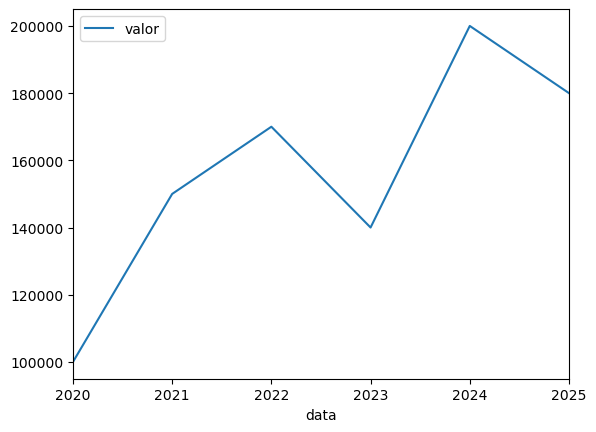

In [96]:
#Gráfico de linha (temporal)

df_faturamento.plot.line(x="data", y="valor")